# Data Analysis of the Boston Marathon 2015-2017

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import colorsys
import seaborn as sns
import warnings
from datetime import datetime
%matplotlib inline
warnings.simplefilter("ignore")

# Dataset of the 2015-2017 Boston Marathon

In [3]:
path = '/home/nathaly/Desktop/Projects/finishers-boston-marathon-2015-2016-2017'
Boston_15 = pd.read_csv(path + '/marathon_results_2015.csv', sep=',')
Boston_16 = pd.read_csv(path +'/marathon_results_2016.csv', sep=',')
Boston_17 = pd.read_csv(path +'/marathon_results_2017.csv', sep=',')
# The total dataset:
Boston_15_to_17 = pd.concat([Boston_15, Boston_16, Boston_17], ignore_index=True, sort=False).set_index('Name')
Boston_15_to_17.head()

,Unnamed: 0,Bib,Age,M/F,City,State,Country,Citizen,Unnamed: 9,5K,...,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division,Unnamed: 8
Name,,,,,,,,,,,,,,,,,,,,,
"Desisa, Lelisa",0.0,3,25,M,Ambo,NaN,ETH,NaN,NaN,0:14:43,...,1:32:00,1:47:59,2:02:39,0:04:56,-,2:09:17,1,1,1,NaN
"Tsegay, Yemane Adhane",1.0,4,30,M,Addis Ababa,NaN,ETH,NaN,NaN,0:14:43,...,1:31:59,1:47:59,2:02:42,0:04:58,-,2:09:48,2,2,2,NaN
"Chebet, Wilson",2.0,8,29,M,Marakwet,NaN,KEN,NaN,NaN,0:14:43,...,1:32:00,1:47:59,2:03:01,0:04:59,-,2:10:22,3,3,3,NaN
"Kipyego, Bernard",3.0,11,28,M,Eldoret,NaN,KEN,NaN,NaN,0:14:43,...,1:32:00,1:48:03,2:03:47,0:05:00,-,2:10:47,4,4,4,NaN
"Korir, Wesley",4.0,10,32,M,Kitale,NaN,KEN,NaN,NaN,0:14:43,...,1:32:00,1:47:59,2:03:27,0:05:00,-,2:10:49,5,5,5,NaN


In [444]:
#Checking the existence of the null values in the dataset
Boston_15_to_17.isnull().sum(axis=0)

Unnamed: 0       26630
Bib                  0
Age                  0
M/F                  0
City                 1
State             8993
Country              0
Citizen          76198
Unnamed: 9       79480
5K                   0
10K                  0
15K                  0
20K                  0
Half                 0
25K                  0
30K                  0
35K                  0
40K                  0
Pace                 0
Proj Time            0
Official Time        0
Overall              0
Gender               0
Division             0
Unnamed: 8       79555
dtype: int64

In [445]:
Boston_15_to_17.columns

Index([u'Unnamed: 0', u'Bib', u'Age', u'M/F', u'City', u'State', u'Country',
       u'Citizen', u'Unnamed: 9', u'5K', u'10K', u'15K', u'20K', u'Half',
       u'25K', u'30K', u'35K', u'40K', u'Pace', u'Proj Time', u'Official Time',
       u'Overall', u'Gender', u'Division', u'Unnamed: 8'],
      dtype='object')

In [4]:
Boston = Boston_15_to_17.drop(['Pace','Unnamed: 0','Bib', 'Gender','Unnamed: 9', 'Division', 'State', 'Citizen','Proj Time','City', 'Unnamed: 8','5K','15K', '10K', '25K', '20K', 'Half', '30K', '35K', '40K', 'Overall'], axis='columns')
Boston.head()

,Age,M/F,Country,Official Time
Name,,,,
"Desisa, Lelisa",25,M,ETH,2:09:17
"Tsegay, Yemane Adhane",30,M,ETH,2:09:48
"Chebet, Wilson",29,M,KEN,2:10:22
"Kipyego, Bernard",28,M,KEN,2:10:47
"Korir, Wesley",32,M,KEN,2:10:49


In [7]:
#Checking the existence of the null values in the dataset
Boston.isnull().sum(axis=0)

Age              0
M/F              0
Country          0
Official Time    0
Overall          0
dtype: int64

In [5]:
# Changing the str columns to time form 
Boston['Official Time'] = pd.to_timedelta(Boston['Official Time'])
# Transforming the time in minutes:
Boston['Official Time'] = Boston['Official Time'].astype('m8[m]').astype(np.int32)

In [6]:
Boston.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79638 entries, Desisa, Lelisa to Rigsby, Scott
Data columns (total 4 columns):
Age              79638 non-null int64
M/F              79638 non-null object
Country          79638 non-null object
Official Time    79638 non-null int32
dtypes: int32(1), int64(1), object(2)
memory usage: 2.7+ MB


In [453]:
Boston.describe()

,Age,Official Time
count,79638.000000,79638.000000
mean,42.415166,232.672744
std,11.355453,41.536700
min,18.000000,129.000000
25%,34.000000,204.000000
50%,42.000000,226.000000
75%,50.000000,255.000000
max,84.000000,630.000000


In [17]:
print('The oldest person finishing the Boston Marathon 2015-2017 was {} years old.\nThe youngest person was {} years old.'.format(Boston['Age'].max(), Boston['Age'].min()))

The oldest person finishing the Boston Marathon 2015-2017 was 84 years old.
The youngest person was 18 years old.


# Distribution of finishers based on Ages

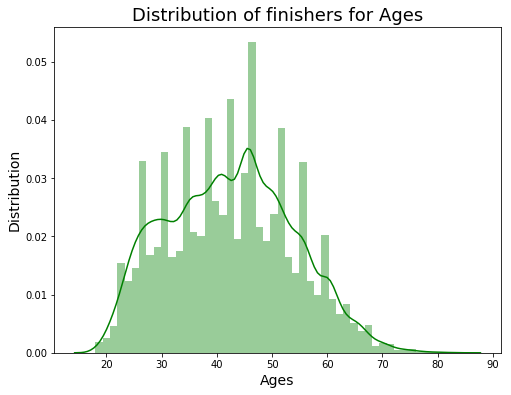

In [454]:
plt.figure(figsize=(8,6))
hage = sns.distplot(Boston.Age, color='g')
hage.set_xlabel('Ages',fontdict= {'size':14})
hage.set_ylabel(u'Distribution',fontdict= {'size':14})
hage.set_title(u'Distribution of finishers for Ages',fontsize=18)
plt.show()
warnings.simplefilter("ignore")

The Boston Marathon finishers are mostly in the 35-50 age range.

# Number of Finishers for Age

In [20]:
len(Boston['Age'].value_counts())

67

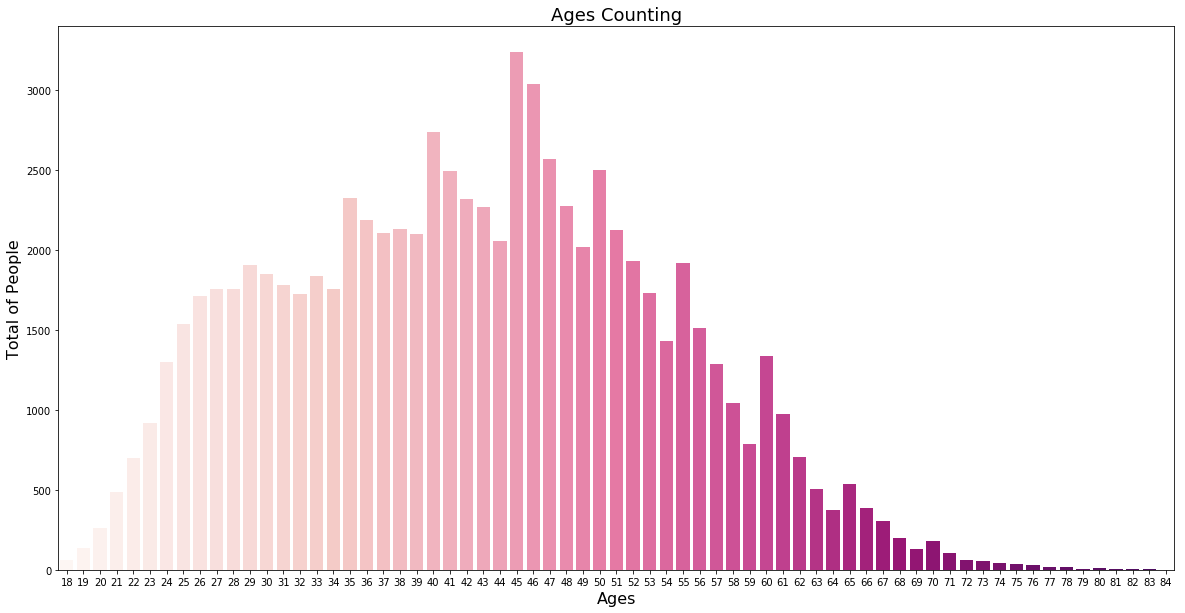

In [21]:
plt.figure(figsize=(20,10))
agecont = sns.countplot('Age',data=Boston, palette=sns.color_palette("RdPu", n_colors=67))
agecont.set_title('Ages Counting', fontsize=18)
agecont.set_xlabel('Ages', fontdict= {'size':16})
agecont.set_ylabel('Total of People', fontdict= {'size':16})
plt.show()

# Gender Distribuition

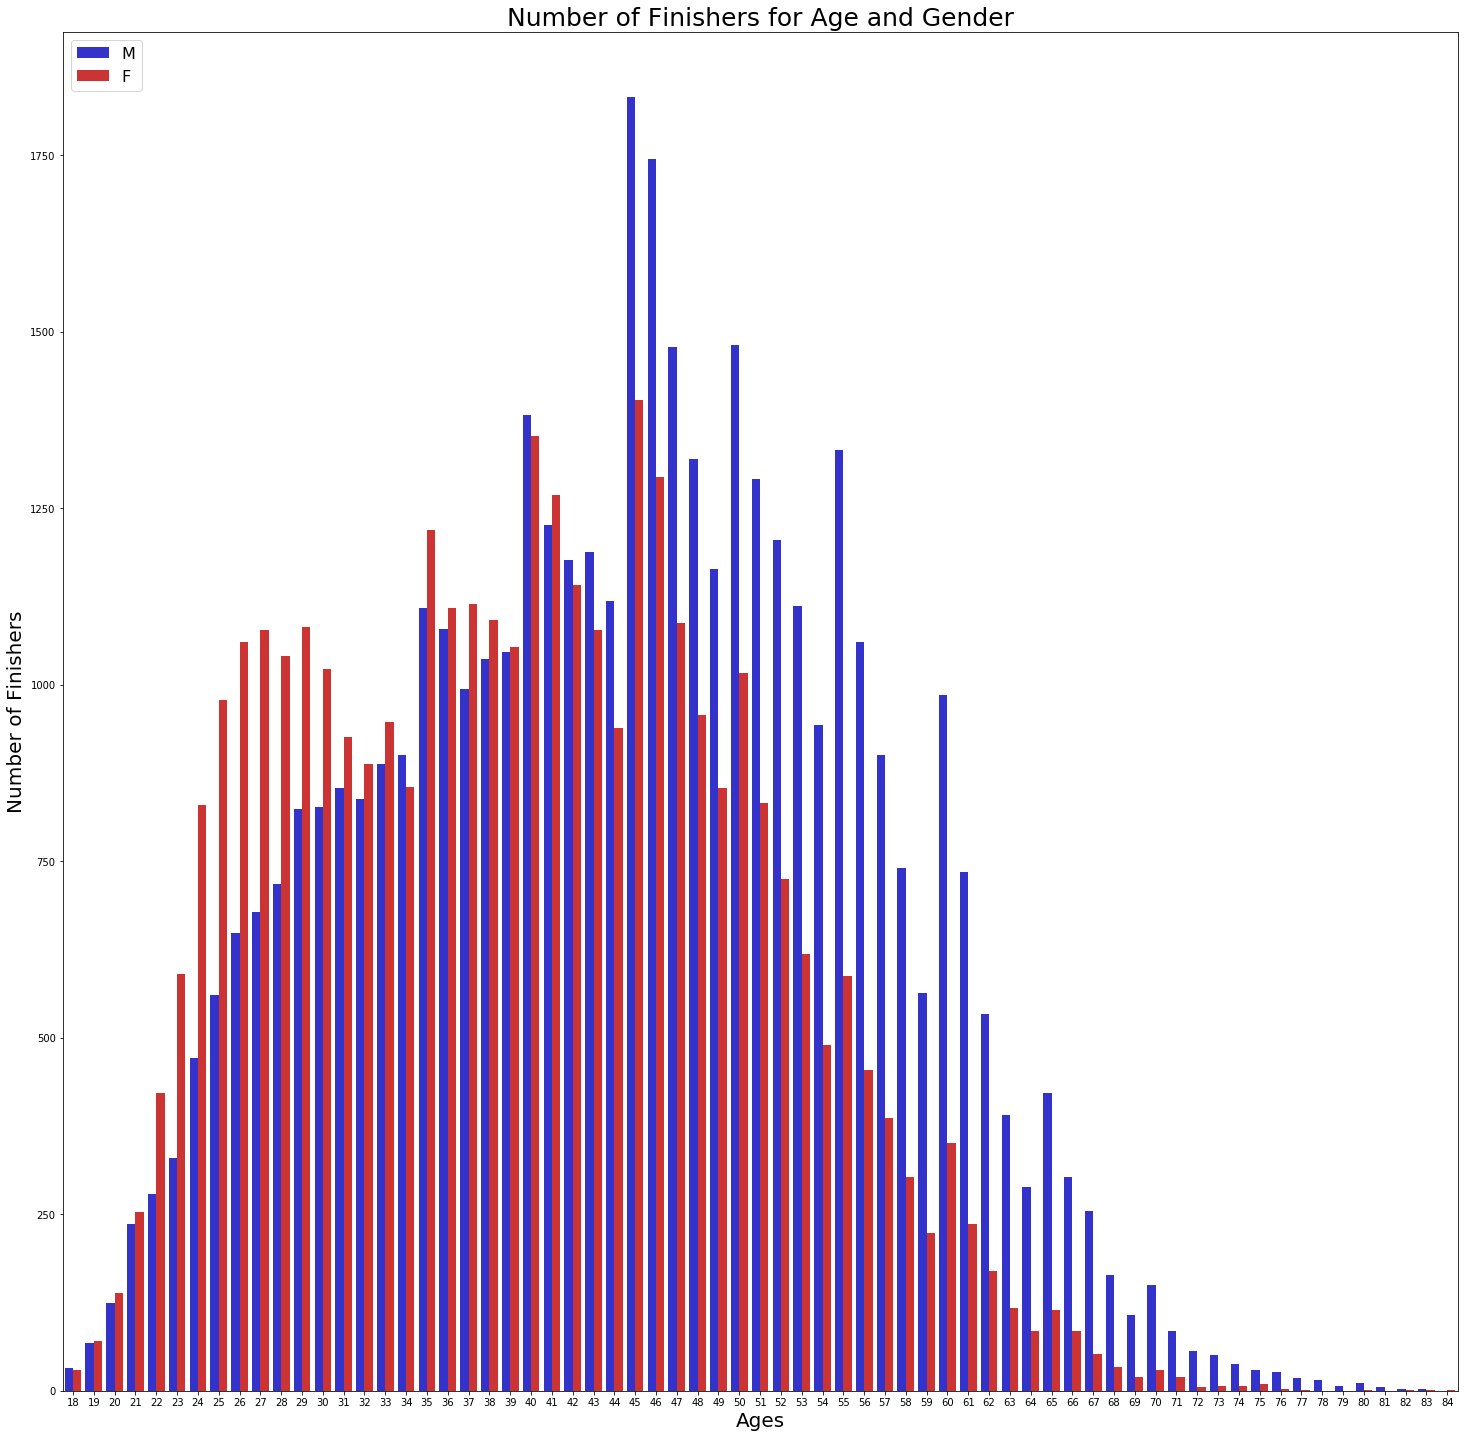

In [22]:
plt.figure(figsize=(25,25))
d = sns.countplot(x='Age', hue='M/F', data=Boston, palette={'F':'r','M':'b'}, saturation=0.6)
d.set_title('Number of Finishers for Age and Gender', fontsize=25)
d.set_xlabel('Ages',fontdict={'size':20})
d.set_ylabel('Number of Finishers',fontdict={'size':20})
d.legend(fontsize=16)
plt.show()

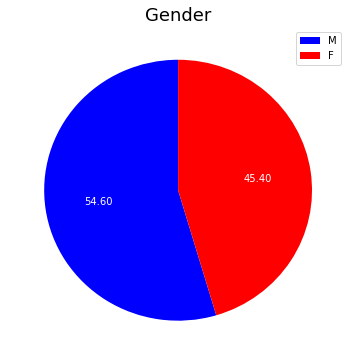

In [23]:
plt.figure(figsize=(6,6))
l = Boston['M/F'].value_counts().index
plt.pie(Boston['M/F'].value_counts(), colors =['b','r'], startangle = 90, autopct='%.2f', textprops=dict(color="w"))
#plt.axes().set_aspect('equal','datalim')
plt.legend(l, loc='upper right')
plt.title("Gender",fontsize=18)
plt.show()

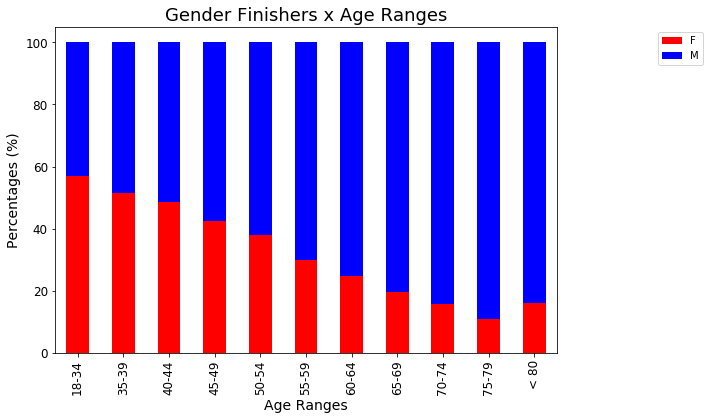

In [437]:
Boston_1 = Boston.copy()
bins = [17, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79, 90]
Boston_1['Ranges'] = pd.cut(Boston_1['Age'],bins,labels=["18-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-64",
                                          "65-69", "70-74", "75-79", "< 80"]) 

Boston_2 = pd.crosstab(Boston_1.Ranges,Boston_1['M/F']).apply(lambda r: (r/r.sum()) * 100 , axis=1)

ax1 = Boston_2.plot(kind = "bar", stacked = True, color = ['r','b'], figsize=(9,6),
                      fontsize=12, position=0.5)
ax1.get_legend_handles_labels
ax1.legend(bbox_to_anchor = (1.3, 1))
ax1.set_xlabel('Age Ranges', fontdict={'size':14})
ax1.set_ylabel('Percentages (%)', fontdict={'size':14})
ax1.set_title('Gender Finishers x Age Ranges', fontsize=18)
plt.show()

The plots above show a significant female participation in the Boston Marathon. In particular, we can observe that up to the age of 38 the female participation is greater than the male participation. After this age the scenario reverses and the male participation overcomes the female participation. Around the age of 35 is the age that many women are preparing to get pregnant, this decline in participation can perhaps be explained by this.

In [31]:
FM_mean = Boston.groupby('M/F').mean()
FM_mean

,Age,Official Time
M/F,,
F,39.770577,243.957379
M,44.614185,223.289384


In [39]:
print('The average age of the female finishers in Boston is {:.2f} years old.'.format(FM_mean['Age'][0]))
print('The average age of the male finishers in Boston is {:.2f} years old.'.format(FM_mean['Age'][1]))
print('The average finishing time of the female finishers in Boston is {:.2f} hours.'.format(FM_mean['Official Time'][0] / 60))
print('The average finishing time of the male finishers in Boston is {:.2f} hours.'.format(FM_mean['Official Time'][1] / 60))

The average age of the female finishers in Boston is 39.77 years old.
The average age of the male finishers in Boston is 44.61 years old.
The average finishing time of the female finishers in Boston is 4.07 hours.
The average finishing time of the male finishers in Boston is 3.72 hours.


# Age x Performance

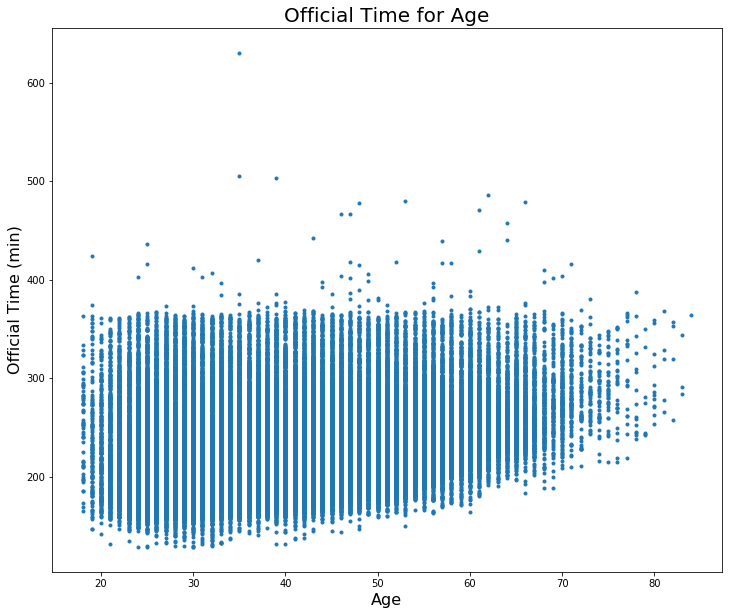

In [8]:
plt.figure(figsize=(12,10))
Boston_copy = Boston.copy()
Boston_copy = Boston_copy[Boston_copy['Age'].isin(range(0,85))]

x = Boston_copy.Age
y = Boston_copy['Official Time']


plt.plot(x, y, '.')
plt.xlabel("Age", fontsize=16)
plt.ylabel("Official Time (min)",fontsize=16)
plt.title("Official Time for Age",fontsize=20)
plt.show()

As we can see from the plot above, using the total datas of the dataset, Boston, it is difficult to find a relation between age and performance.

Then, we will consider the mean and median of the official time for each age.

In [10]:
# The mean of official time for the set of Age 
mean_age_time = Boston.groupby('Age').mean().set_index(np.arange(67))
mean_age_time['Age'] = mean_age_time.index 
mean_age_time.head()

,Official Time,Age
0,254.919355,0
1,240.153285,1
2,230.784091,2
3,232.560327,3
4,233.858773,4


In [11]:
# The median of official time for the set of Age 
median_age_time = Boston.groupby('Age').median().set_index(np.arange(67))
median_age_time['Age'] = median_age_time.index 
median_age_time.head()

,Official Time,Age
0,255.5,0
1,228.0,1
2,224.0,2
3,223.0,3
4,226.0,4


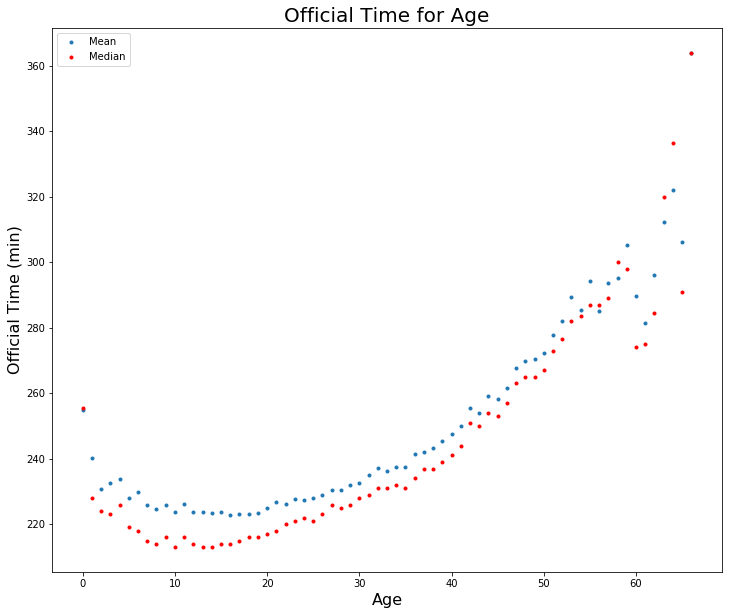

In [12]:
# Plotting the results

plt.figure(figsize=(12,10))

x = mean_age_time['Age']
y = mean_age_time['Official Time']

plt.plot(x, y, '.')

xx = median_age_time['Age']
yy = median_age_time['Official Time']


plt.plot(xx, yy, '.', color = 'r')


plt.xlabel("Age", fontsize=16)
plt.ylabel("Official Time (min)",fontsize=16)
plt.title("Official Time for Age",fontsize=20)
plt.legend(['Mean', 'Median'])
plt.show()

Therefore, we can observe that a polynomial approximation (such as a quadratic, cubic polinomials) seems to be the better way to relate Age and Official time. 

# Predicting the Official Time

In [16]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
warnings.simplefilter("ignore", category=FutureWarning)

In [17]:
# Defining the dependent and independent variables 
X = mean_age_time.drop(['Official Time'], axis=1)
Y = mean_age_time['Official Time']

In [18]:
# Separeting the dataset in training and test datasets:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

((44, 1), (23, 1), (44,), (23,))


In [19]:
# Constructing the model 
model = make_pipeline(PolynomialFeatures(degree=2), Ridge())
model

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [20]:
# Training the model with the training variables:
model.fit(X_train, Y_train)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [29]:
# We show to the model the unknown test variables, in order to predict the results. 
# Then we can compare to the respective Y_test dependent variable, and check the error of the model. 
pred_test = model.predict(X_test)

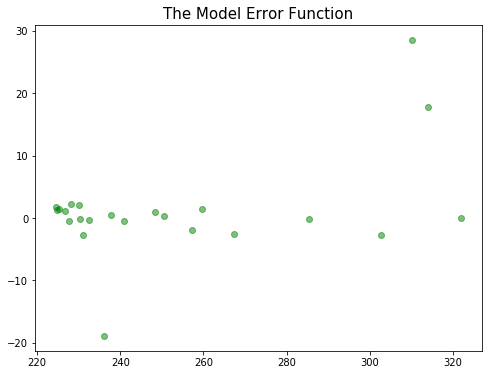

In [30]:
# Plotting the error of the model:
plt.figure(figsize=(8,6))
#plt.scatter(pred_training, pred_training - Y_training, c = 'b', alpha = 0.5)
plt.scatter(pred_test,  pred_test - Y_test, c = 'g', alpha = 0.5)
plt.title(u"The Model Error Function", fontsize=15)
plt.show()

Since the difference between the test data predicted by the model and the data that we expected to obtain are mostly close to zero, it can be said that the model considered revalues a good prediction of time by age of each athlete.